In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared, Sum, Product

import sys
sys.path.append("..")
from mcpm.kernels import *

np.random.seed(1)

## Functions

In [3]:
def gram_matrix(x1,x2,k):
    init_op = tf.initialize_all_variables()
    with tf.Session() as sess:
        sess.run(init_op)
        k = sess.run(k.kernel(x1,x2))
    return k

# GP function
def GP(a , b, k, mu, kernel, samples) :
    f = np.random.multivariate_normal(mu.flatten(), kernel(a, b, k) , samples)
    return f

## Initialising Kernels

In [15]:
# RBF & Periodic Kernels
RBF_Periodic_Product = Separable_Product(input_dim=1, spatial_kernel="RadialBasis", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

RBF_Periodic_Sum = Separable_Sum(input_dim=1, spatial_kernel="RadialBasis", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)


# RBF & Spectral Mixture Kernels
RBF_SM_Product = Separable_Product(input_dim=1, spatial_kernel="RadialBasis", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

RBF_SM_Sum = Separable_Sum(input_dim=1, spatial_kernel="RadialBasis", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)


# Matern-32 & Periodic Kernels
M32_Periodic_Product = Separable_Product(input_dim=1, spatial_kernel="Matern_3_2", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

M32_Periodic_Sum = Separable_Sum(input_dim=1, spatial_kernel="Matern_3_2", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)


# Matern-32 & Spectral Mixture Kernels
M32_SM_Product = Separable_Product(input_dim=1, spatial_kernel="Matern_3_2", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

M32_SM_Sum = Separable_Sum(input_dim=1, spatial_kernel="Matern_3_2", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)


# Matern-52 & Periodic Kernels
M52_Periodic_Product = Separable_Product(input_dim=1, spatial_kernel="Matern_5_2", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

M52_Periodic_Sum = Separable_Sum(input_dim=1, spatial_kernel="Matern_5_2", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)

# Matern-52 & Spectral Mixture Kernels
M52_SM_Product = Separable_Product(input_dim=1, spatial_kernel="Matern_5_2", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

M52_SM_Sum = Separable_Sum(input_dim=1, spatial_kernel="Matern_5_2", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)


# Exponential & Periodic Kernels
Exp_Periodic_Product = Separable_Product(input_dim=1, spatial_kernel="Exponential", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

Exp_Periodic_Sum = Separable_Sum(input_dim=1, spatial_kernel="Exponential", temporal_kernel="Periodic", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)

# Exponential & Spectral Mixture Kernels
Exp_SM_Product = Separable_Product(input_dim=1, spatial_kernel="Exponential", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                          white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, num_components=1, weights=[[1.0]], 
                                          means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

Exp_SM_Sum = Separable_Sum(input_dim=1, spatial_kernel="Exponential", temporal_kernel="SpectralMixture", lengthscale = 1.0, std_dev = 1.0, 
                                 white = 0.01, input_scaling = False, period = 1.0)

## Create Input Data

In [5]:
# Input data
#x0 = np.zeros(1000).reshape(1000,1).astype('float32')
#x = np.linspace(0,2,1000).reshape(-1,1).astype('float32')

x1 = np.linspace(0.0,5.0,50)
x2 = np.linspace(0.0,2.0,50)
x1,x2 = np.meshgrid(x1,x2)
inputs = np.array([x1.flatten(),x2.flatten()]).astype('float32').T

mean = np.zeros(2500)

## RBF & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

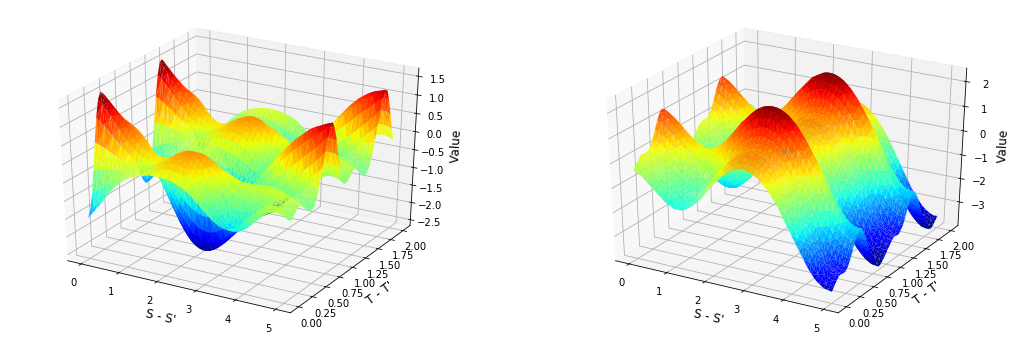

In [16]:
# Sample from GP
sample1 = GP(inputs, inputs, RBF_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, RBF_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## RBF & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

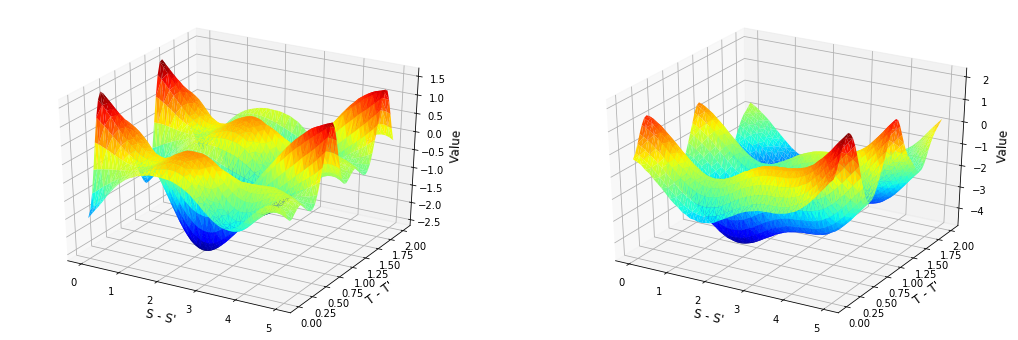

In [17]:
# Sample from GP
sample1 = GP(inputs, inputs, RBF_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, RBF_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-3/2 & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

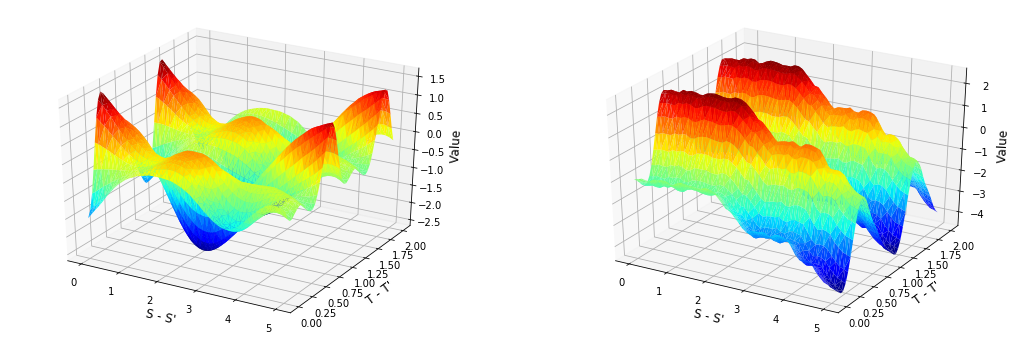

In [18]:
# Sample from GP
sample1 = GP(inputs, inputs, M32_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M32_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-3/2 & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

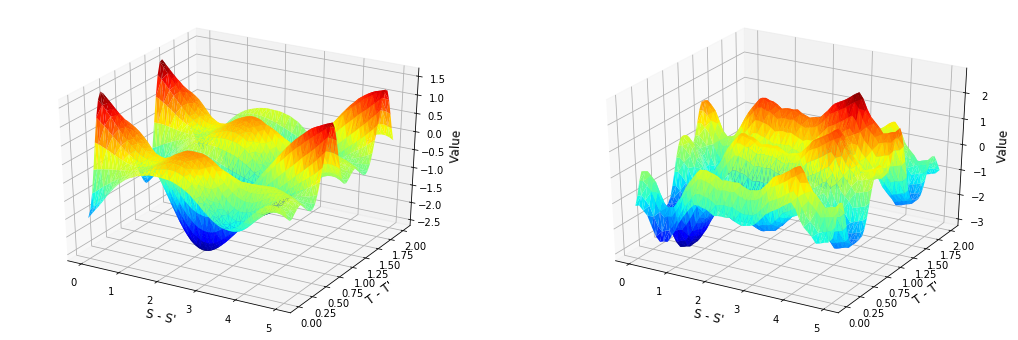

In [19]:
# Sample from GP
sample1 = GP(inputs, inputs, M32_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M32_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-5/2 & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

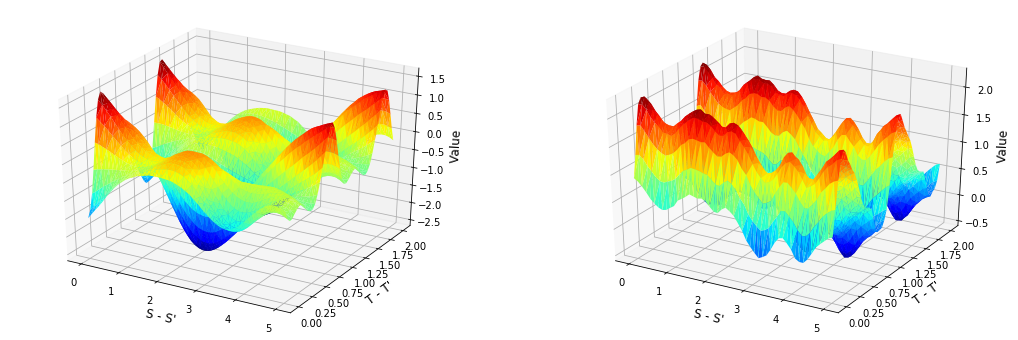

In [20]:
# Sample from GP
sample1 = GP(inputs, inputs, M52_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M52_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-5/2 & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

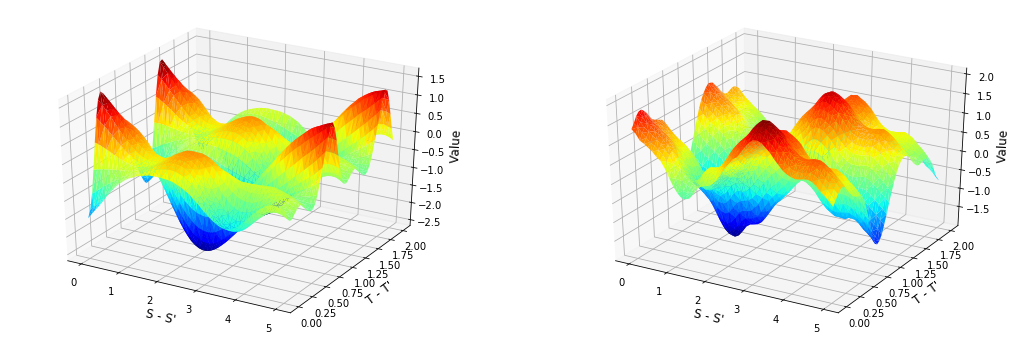

In [21]:
# Sample from GP
sample1 = GP(inputs, inputs, M52_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M52_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Exponential & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

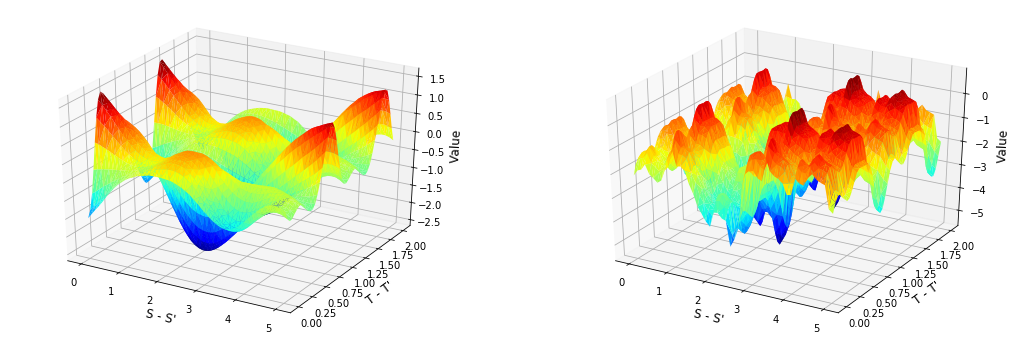

In [22]:
# Sample from GP
sample1 = GP(inputs, inputs, Exp_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, Exp_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Exponential & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

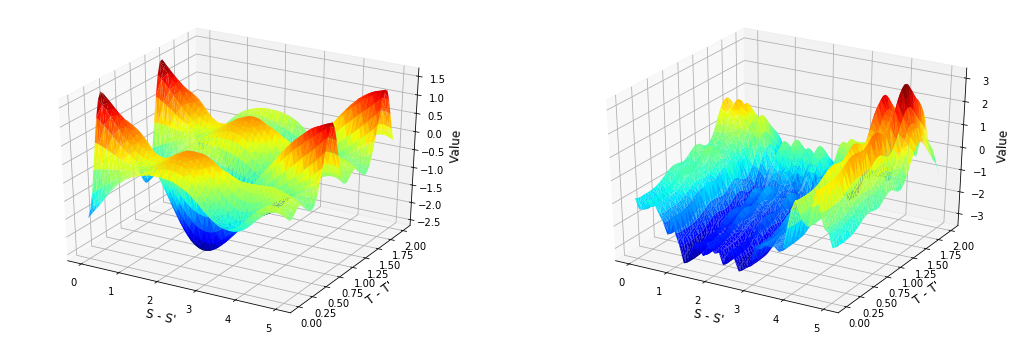

In [23]:
# Sample from GP
sample1 = GP(inputs, inputs, Exp_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, Exp_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')